# Part I - (Prosper Loan Data)
## by (Ismail Omodara)

## Introduction
This document explores a dataset containing loans and attributes for approximately 114,000 loan listing, with about 81 unique variables (such as loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others) to give more information about each data entry (loan). Furthermore, for the purpose of our exploration and explanation, we would focus on paying attention to just 14 out of the 81 variables.

<span id="dataset-variables"></span>
Variables we would be exploring
    <ol>
        <li>**Term** - The length of the loan expressed in months.</li>
        <li>**LoanStatus** - The current status of the loan.</li>
        <li>**BorrowerRate** - The Borrower's interest rate for this loan. </li>
    <li>**ProsperScore** - A custom risk score built using historical Prosper data.</li>
        <li>**Occupation** - The Occupation selected by the Borrower at the time they created the listing.</li>
        <li>**EmploymentStatus** - The employment status of the borrower at the time they posted the listing.</li>
    <li>**EmploymentStatusDuration** - The length in months of the employment status at the time the listing was created.</li>
    <li>**OpenRevolvingMonthlyPayment** - Monthly payment on revolving accounts at the time the credit profile was pulled.</li>
    <li>**DebtToIncomeRatio** </li>
        <li>**StatedMonthlyIncome** - The monthly income the borrower stated at the time the listing was created.</li>
        <li>**LoanOriginalAmount** - The origination amount of the loan.</li>
        <li>**MonthlyLoanPayment** - The scheduled monthly loan payment.</li>
    <li>**ProsperPrincipalBorrowed** - The number of investers that funded the loan.</li>
    <li>**ProsperPrincipalOutstanding** - Principal outstanding on Prosper loans at the time the listing was created. This value will be null if the borrower had no prior loans.</li>
    </ol>




In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Load in the dataset into a pandas dataframe
loans_all = pd.read_csv('prosperLoanData.csv')

In [3]:
print(loans_all.shape)
loans_all.head()

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# Since we would be dealing with specific variables, we can to create a copy of the original
# dataset so we can see all columns at once

variables = ["Term", "LoanStatus", "BorrowerRate", "ProsperScore", "Occupation",  "DebtToIncomeRatio", 
             "EmploymentStatus", "EmploymentStatusDuration", "OpenRevolvingMonthlyPayment", "StatedMonthlyIncome", 
             "LoanOriginalAmount", "MonthlyLoanPayment", "ProsperPrincipalBorrowed", "ProsperPrincipalOutstanding"]

loans = loans_all[variables].copy()

In [5]:
print(loans.shape)
loans.head()

(113937, 14)


,Term,LoanStatus,BorrowerRate,ProsperScore,Occupation,DebtToIncomeRatio,EmploymentStatus,EmploymentStatusDuration,OpenRevolvingMonthlyPayment,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding
0,36,Completed,0.1580,NaN,Other,0.17,Self-employed,2.0,24.0,3083.333333,9425,330.43,NaN,NaN
1,36,Current,0.0920,7.0,Professional,0.18,Employed,44.0,389.0,6125.000000,10000,318.93,NaN,NaN
2,36,Completed,0.2750,NaN,Other,0.06,Not available,NaN,0.0,2083.333333,3001,123.32,NaN,NaN
3,36,Current,0.0974,9.0,Skilled Labor,0.15,Employed,113.0,115.0,2875.000000,10000,321.45,NaN,NaN
4,36,Current,0.2085,4.0,Executive,0.26,Employed,44.0,220.0,9583.333333,15000,563.97,11000.0,9947.9


In [6]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Term                         113937 non-null  int64  
 1   LoanStatus                   113937 non-null  object 
 2   BorrowerRate                 113937 non-null  float64
 3   ProsperScore                 84853 non-null   float64
 4   Occupation                   110349 non-null  object 
 5   DebtToIncomeRatio            105383 non-null  float64
 6   EmploymentStatus             111682 non-null  object 
 7   EmploymentStatusDuration     106312 non-null  float64
 8   OpenRevolvingMonthlyPayment  113937 non-null  float64
 9   StatedMonthlyIncome          113937 non-null  float64
 10  LoanOriginalAmount           113937 non-null  int64  
 11  MonthlyLoanPayment           113937 non-null  float64
 12  ProsperPrincipalBorrowed     22085 non-null   float64
 13 

In [7]:
loans.describe()

,Term,BorrowerRate,ProsperScore,DebtToIncomeRatio,EmploymentStatusDuration,OpenRevolvingMonthlyPayment,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding
count,113937.000000,113937.000000,84853.000000,105383.000000,106312.000000,113937.000000,1.139370e+05,113937.00000,113937.000000,22085.000000,22085.000000
mean,40.830248,0.192764,5.950067,0.275947,96.071582,398.292161,5.608026e+03,8337.01385,272.475783,8472.311961,2930.313906
std,10.436212,0.074818,2.376501,0.551759,94.480605,447.159711,7.478497e+03,6245.80058,192.697812,7395.507650,3806.635075
min,12.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,1000.00000,0.000000,0.000000,0.000000
25%,36.000000,0.134000,4.000000,0.140000,26.000000,114.000000,3.200333e+03,4000.00000,131.620000,3500.000000,0.000000
50%,36.000000,0.184000,6.000000,0.220000,67.000000,271.000000,4.666667e+03,6500.00000,217.740000,6000.000000,1626.550000
75%,36.000000,0.250000,8.000000,0.320000,137.000000,525.000000,6.825000e+03,12000.00000,371.580000,11000.000000,4126.720000
max,60.000000,0.497500,11.000000,10.010000,755.000000,14985.000000,1.750003e+06,35000.00000,2251.510000,72499.000000,23450.950000


### Observation

#### Data Quality and Tidiness Issue
- Occupation
- EmploymentStatus
- EmploymentStatusDuration
- LoanStatus - This should be a categorial data type.
- ProsperScore - The missing values for entry before July 2009. Also maximum value should be 10.
- DebtToIncomeRatio - Missing values
- ProsperPrincipalBorrowed - Missing values
- ProsperPrincipalOutstanding - Missing values


### Cleaning Dataset

In [8]:
# Make a copy of dataset

loans_clean = loans.copy()

In [9]:
# Remove all entries with empty BorrowerAPR, Occupation, EmploymentStatus, EmploymentStatusDuration values

print('Before removal - {}'.format(loans_clean.shape))

loans_clean = loans_clean[loans_clean['Occupation'].notna()]
loans_clean = loans_clean[loans_clean['EmploymentStatus'].notna()]
loans_clean = loans_clean[loans_clean['EmploymentStatusDuration'].notna()]

print('After removal - {}'.format(loans_clean.shape))

Before removal - (113937, 14)
After removal - (104985, 14)


In [10]:
# Convert LoanStatus to a categorial data type

status_categories = loans_clean['LoanStatus'].value_counts().index
loan_statuses = pd.api.types.CategoricalDtype(ordered=True, categories=status_categories)

loans_clean['LoanStatus'] =  loans_clean['LoanStatus'].astype(loan_statuses);

In [11]:
# Checking for the LoanStatus of entries with ProsperScore as null

print('Empty Prosper Scores - ', loans_clean.ProsperScore.isnull().sum())
loans_clean[loans_clean.ProsperScore.isnull()]['LoanStatus'].value_counts()

Empty Prosper Scores -  21478


Completed                 13891
Chargedoff                 5300
Defaulted                  2286
Cancelled                     1
Current                       0
Past Due (1-15 days)          0
Past Due (31-60 days)         0
Past Due (61-90 days)         0
Past Due (91-120 days)        0
Past Due (16-30 days)         0
FinalPaymentInProgress        0
Past Due (>120 days)          0
Name: LoanStatus, dtype: int64

In [12]:
# Calculating the mean of ProsperScore for Completed, Chargedoff, Defualted

print('Completed Mean - ', loans_clean.query('LoanStatus == "Completed"')['ProsperScore'].mean())
print('ChargedOff Mean - ', loans_clean.query('LoanStatus == "Chargedoff"')['ProsperScore'].mean())
print('Defaulted Mean - ', loans_clean.query('LoanStatus == "Defaulted"')['ProsperScore'].mean())

Completed Mean -  6.5379250661779675
ChargedOff Mean -  5.390701162354706
Defaulted Mean -  5.619900497512438


In [13]:
# We have created a function to help assign a value to all the entires with NaN ProsperScore
'''
    Completed - Borrower completed loan repayment on time, hence a high score (low risk) value is assigned.
    Chargedoff - Borrower completed loan repayment before time, hence a higher score (lower risk) value is assigned.
    Defaulted - Borrower did not complete loan repayment, hence lower score (high risk)
    Cancelled - A lower score than Defaulted
'''
def set_prosper_score(entry):
    
    score = entry.ProsperScore
    status = entry.LoanStatus
    
    if (score > 0):
        return score
    else:
        if (status == 'Completed'):
            return 7.0
        elif (status == 'Chargedoff'):
            return 5.0
        elif (status == 'Defaulted'):
            return 6.0
        else:
            return 1.0

In [14]:
loans_clean.ProsperScore.isnull().sum()

21478

In [15]:
# Fill up the null ProsperScore in the dataset

loans_clean['ProsperScore'] = loans_clean.apply(set_prosper_score, axis=1)

In [16]:
# Retain all entries where ProsperScore <= 10

loans_clean = loans_clean[loans_clean['ProsperScore'] <= 10.0]

In [17]:
loans_clean.ProsperScore.isnull().sum()

0

In [18]:
# Filling up null values in ProsperPrincipalBorrowed and ProsperPrincipalOutstanding

loans_clean['ProsperPrincipalBorrowed'].fillna(0.0, inplace=True)
loans_clean['ProsperPrincipalOutstanding'].fillna(0.0, inplace=True)

In [19]:
# Remove all DebtToIncomeRatio with null values

loans_clean = loans_clean[loans_clean['DebtToIncomeRatio'].notna()]

In [20]:
# Reviewing the result of the cleaning exercise

loans_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95169 entries, 0 to 113936
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Term                         95169 non-null  int64   
 1   LoanStatus                   95169 non-null  category
 2   BorrowerRate                 95169 non-null  float64 
 3   ProsperScore                 95169 non-null  float64 
 4   Occupation                   95169 non-null  object  
 5   DebtToIncomeRatio            95169 non-null  float64 
 6   EmploymentStatus             95169 non-null  object  
 7   EmploymentStatusDuration     95169 non-null  float64 
 8   OpenRevolvingMonthlyPayment  95169 non-null  float64 
 9   StatedMonthlyIncome          95169 non-null  float64 
 10  LoanOriginalAmount           95169 non-null  int64   
 11  MonthlyLoanPayment           95169 non-null  float64 
 12  ProsperPrincipalBorrowed     95169 non-null  float64 
 13  

In [21]:
loans_clean.describe()

,Term,BorrowerRate,ProsperScore,DebtToIncomeRatio,EmploymentStatusDuration,OpenRevolvingMonthlyPayment,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding
count,95169.000000,95169.000000,95169.000000,95169.000000,95169.000000,95169.000000,95169.000000,95169.000000,95169.000000,95169.000000,95169.000000
mean,41.314504,0.192229,6.077221,0.276812,96.900966,407.939739,5697.589809,8614.857138,279.633790,1655.386593,593.062210
std,10.790442,0.074154,2.070594,0.531562,93.373382,438.317897,4904.815354,6294.270728,192.881578,4576.136171,2071.682509
min,12.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,0.000000
25%,36.000000,0.134600,5.000000,0.150000,27.000000,129.000000,3333.333333,4000.000000,138.470000,0.000000,0.000000
50%,36.000000,0.182400,6.000000,0.220000,68.000000,285.000000,4833.333333,7000.000000,230.360000,0.000000,0.000000
75%,36.000000,0.249900,7.000000,0.320000,139.000000,537.000000,6916.666667,12000.000000,377.980000,0.000000,0.000000
max,60.000000,0.360000,10.000000,10.010000,755.000000,14985.000000,483333.333333,35000.000000,2251.510000,65000.000000,23450.950000


#### Finalised Dataset

After our cleaning exercise, we can see our resulting dataset `loans_clean`.

In [22]:
# Save our clean dataset

loans_clean.to_csv('prosperLoanDataClean.csv', index=False)

### What is the structure of your dataset?

There are 95,169 entries in the dataset with 14 variables (as listed <a href="#dataset-variables">here</a>).

LoanStatus - [Cancelled, Chargedoff, Completed, Current, Defaulted,  FinalPaymentInProgress, PastDue] <br>
ProsperScore - The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009. <br>
  
### What is/are the main feature(s) of interest in your dataset?

We are most interested in figuring out what factors can be used to predict the status of loan's outcome.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

We would expect that MonthlyLoanPayment with Term would have an impact on the eventual loan's status. We also think that StatedMonthlyIncome would have an impact, as well as the borrower's employment status.

## Univariate Exploration

Our variables of interest includes <br>
   - Term <br>
   - LoanStatus <br>
   - BorrowerRate <br>
   - ProsperScore <br>
   - EmploymentStatus <br>

In [23]:
# Setting a default color to be used in our visualisation
color = sb.color_palette()[0]

#### What is the loan term borrowers seem to be most comfortbale with?

In [24]:
'''
    This function helps to plot a simple bar chart with
    the provided information.
    axis - Which axis to plot the categorical variable
    varialbe - Which variable to plot
    xlabel - The label for the x-axis
    ylabel - The label for the y-axis
'''
def plot_bar(axis, variable, title, xlabel, ylabel):
    if (axis == 'x'):
        sb.countplot(data = loans_clean, x = variable, color = color);
    else:
        sb.countplot(data = loans_clean, y = variable, color = color);
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

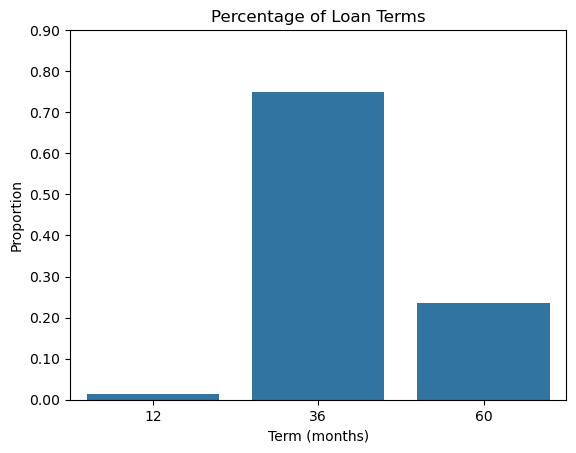

In [25]:
# Displaying the visualization as proportion.

plot_bar("x", "Term", "Percentage of Loan Terms", "Term (months)", "Proportion")

tick_props = np.arange(0, 1, 0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.yticks(tick_props * loans_clean.shape[0], tick_names);

We can see that close to 80% of the listings were scheduled for a duration of 36 months (3 years) for payback. It seems like most borrowers are convenient with this period as it creates better timeline and payback schedule for them to ensure they do not default or past due date.

#### How often do borrowers complete their request loans?

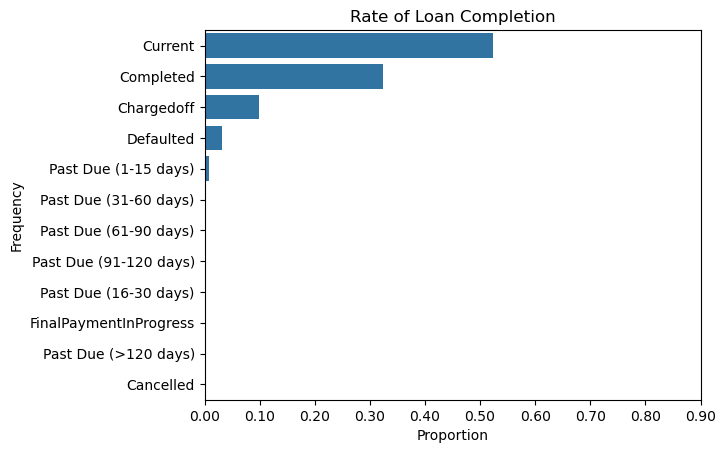

In [26]:
plot_bar("y", "LoanStatus", "Rate of Loan Completion", "Proportion", "Frequency")

tick_props = np.arange(0, 1, 0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.xticks(tick_props * loans_clean.shape[0], tick_names);

Approximately 40% of the loans have been completed (Completed or Chargedoff), which indicates there's a high completion rate. Borrowers tend to complete their loans, which means we would be able to get facters that contribute to this behaviour

#### Would the interest rate attached to the loan have an effect of the ability for a borrower to pay back?

In [27]:
def plot_hist(variable, binsize, title, xlabel, ylabel):
    bins = np.arange(0, loans_clean[variable].max()+binsize, binsize)
    
    plt.hist(data = loans_clean, x = variable, bins = bins)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

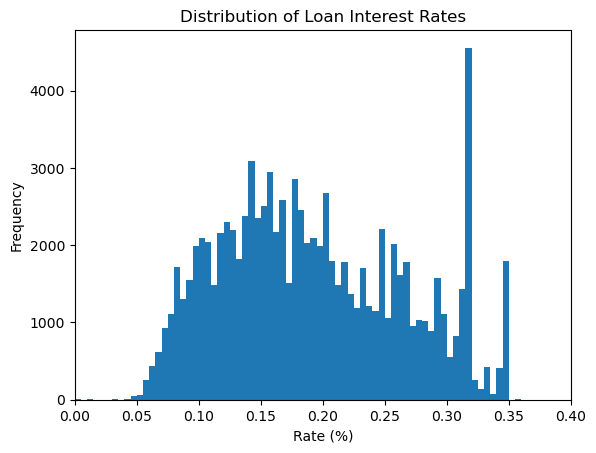

In [28]:
plot_hist("BorrowerRate", 0.005, "Distribution of Loan Interest Rates", "Rate (%)", "Frequency");
plt.xlim(0,0.4);

There seem to be a spike in the 0.3% interest rate. This should be able to tell us if there are conditions that predetermined the interest on a loan.

#### Is ProsperScore an important factor to consider?

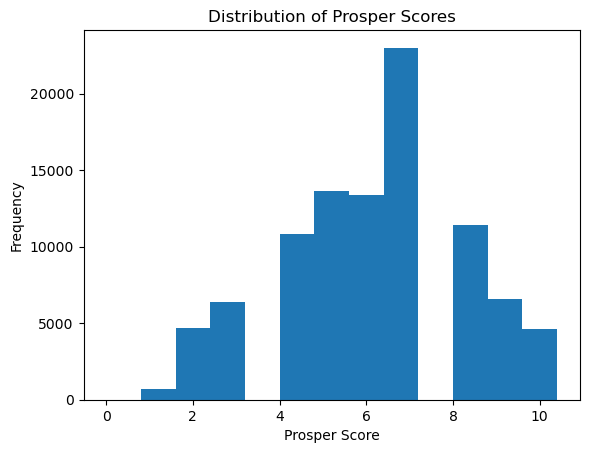

In [29]:
plot_hist("ProsperScore", 0.8, "Distribution of Prosper Scores", "Prosper Score", "Frequency")

Most of the data points for the ProsperScore is skewed to the left

#### What is distribution on requested loan amounts?

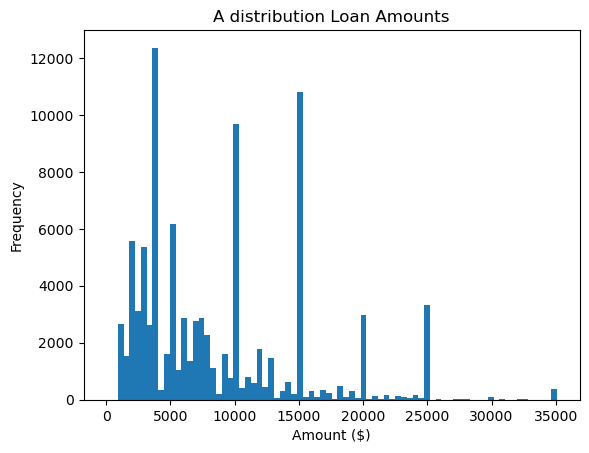

In [30]:
plot_hist("LoanOriginalAmount", 450, "A distribution Loan Amounts", "Amount ($)", "Frequency")

A lot of borrowers tend to always borrow amount that are multiple of 5. This could be an indication of people always not wanting to get the exact amount they need, but rather close it up to a round figure.

#### Do most borrowers have a guaranteed means of paying back?

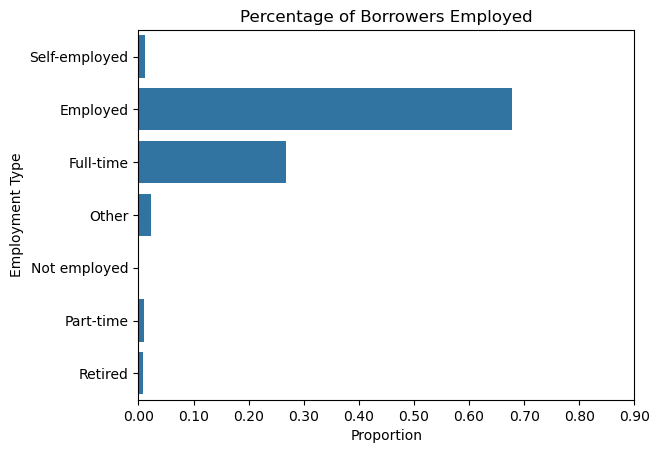

In [31]:
plot_bar("y", "EmploymentStatus", "Percentage of Borrowers Employed", "Proportion", "Employment Type")


tick_props = np.arange(0, 1, 0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

plt.xticks(tick_props * loans_clean.shape[0], tick_names);

We can see that a very high percentage of borrowers have a job, with close to 70% being employed with active income and a quarter of that, a full-time job.

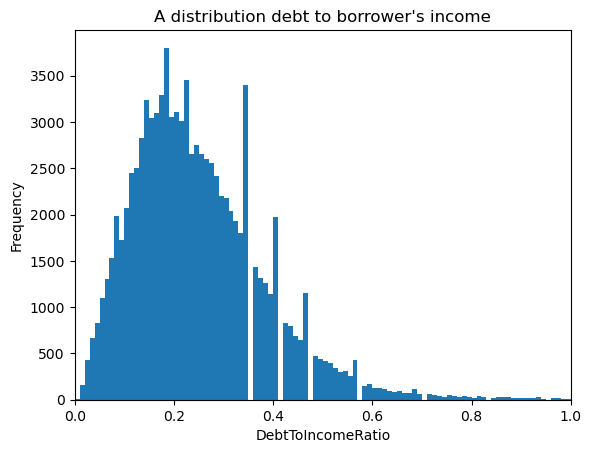

In [32]:
plot_hist("DebtToIncomeRatio", 0.01, "A distribution debt to borrower's income", "DebtToIncomeRatio", "Frequency")
plt.xlim(0,1);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The Loan Amount showed a peak in amounts that are divisible by 5. And we said this could be an indication of people always not wanting to get the exact amount they need, but rather close it up to a round figure. No transformation was done.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Yes, the ProsperScore variable had null value for some entries (about 29,000). Based on the explanation of what the ProsperScore is (A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score), I was able to fill up the null values based on the mean of LoanStatus for entries with valid ProsperScores.

## Bivariate Exploration

In this section, we would investigate relationships between pairs of our variables of interest as mentioned in the Univariate secdtion.

#### What loan term is common for high completion rate?

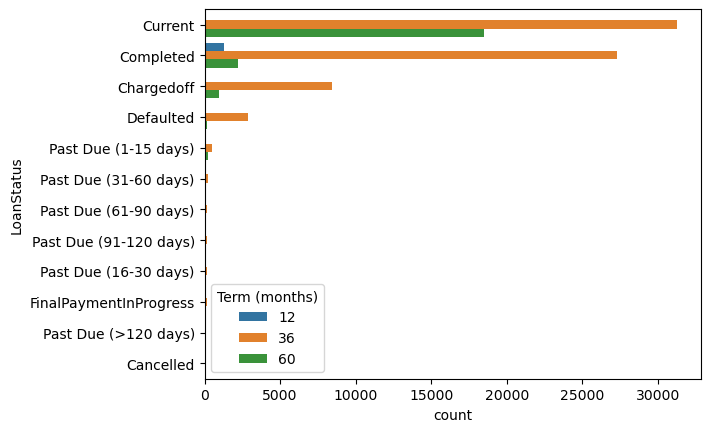

In [33]:
sb.countplot(data=loans_clean, y='LoanStatus', hue='Term');
plt.legend(title="Term (months)");

Most borrowers who have completed their loans or in the process of doing that tend to have a repayment period of 36 months (3 years). It is possible that this duration is associated with how comfortable it would be to repay the loan.

In [34]:
def plot_box(x, y, xlabel, ylabel):
    sb.boxplot(data=loans_clean, x=x, y=y, color=color);
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

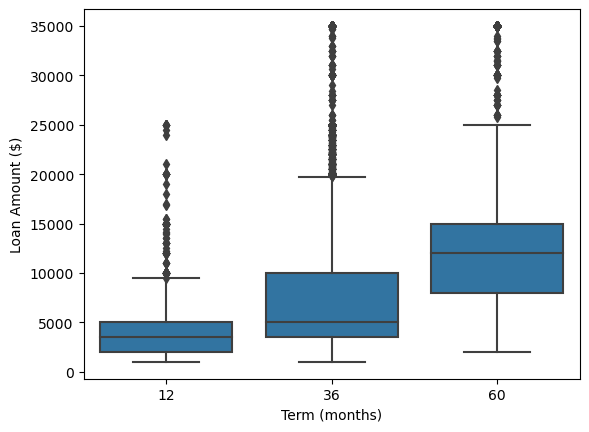

In [35]:
plot_box('Term','LoanOriginalAmount', "Term (months)", "Loan Amount ($)");

Looks like borrowers to request for more more money tend to also request for more time.

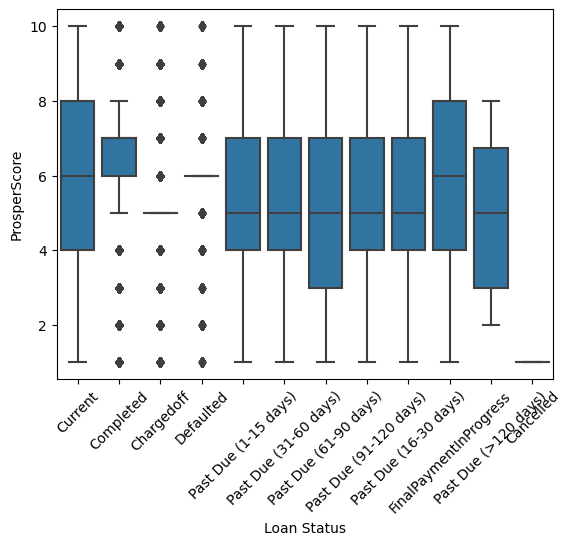

In [36]:
plot_box('LoanStatus','ProsperScore', "Loan Status", "ProsperScore");
plt.xticks(rotation=45);

The varying range of ProsperScore tells us what the possible outcome of the loan might be. Borrower's who have completed their loans have a higher ProsperScore (low risk), which means, if they come back, we can always predict they would complete their loans. Same behaviour can be assumed for other LoanStatuses.

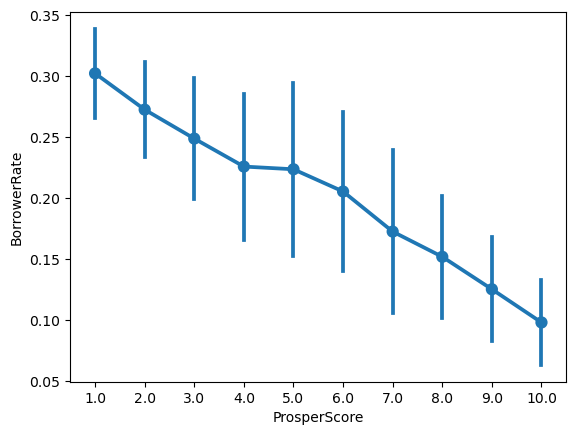

In [37]:
sb.pointplot(data=loans_clean, x='ProsperScore', y='BorrowerRate', errorbar='sd');

As earlier anticipated, the ProsperScore of a borrower has an effect of the interest rate of their loans.

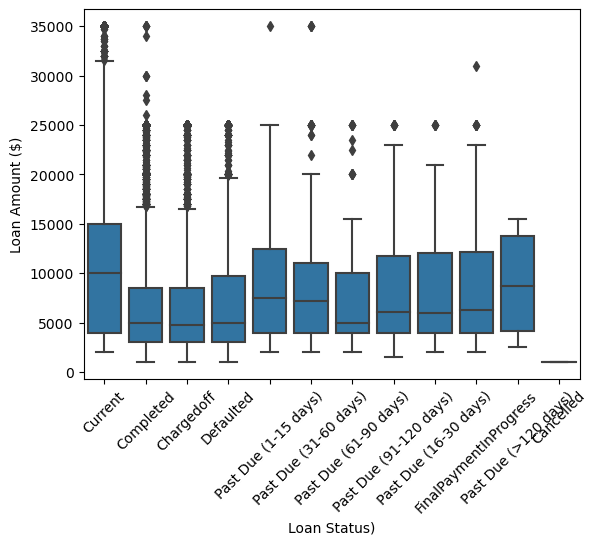

In [38]:
plot_box('LoanStatus','LoanOriginalAmount', "Loan Status)", "Loan Amount ($)");
plt.xticks(rotation=45);

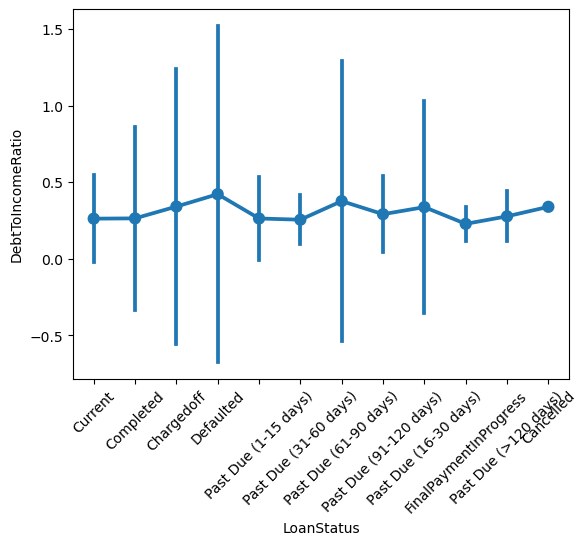

In [39]:
sb.pointplot(data=loans_clean, x='LoanStatus', y='DebtToIncomeRatio', errorbar='sd');
plt.xticks(rotation=45);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

A loan outcome can be predicted based on the Term of the loan and their ProsperScore. A high percentage of completed loans or loans in the process of completion have a duration of 36months (3 years) and relatively high ProsperScore.
People who tend to default have a high debt to income ratio.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
DebtToIncomeRatio can also be used to make a prediction of the possible outcome of the loan

## Multivariate Exploration

The main interest here is to explore in this part of the analysis is how BorrowerRate and ProsperScore can be used to predict the status of the loan outcome

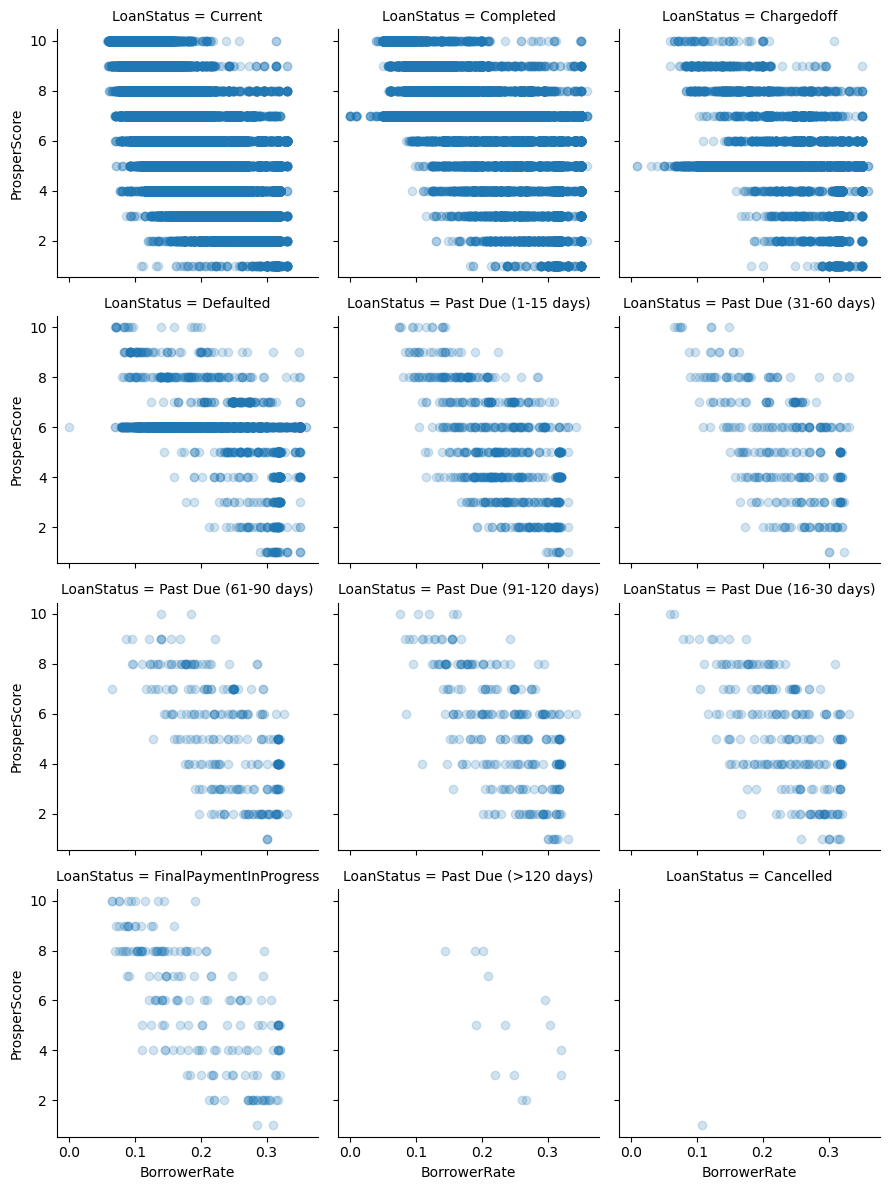

In [40]:
g = sb.FacetGrid(data = loans_clean, col = 'LoanStatus', col_wrap = 3)
g.map(plt.scatter, 'BorrowerRate', 'ProsperScore', alpha = 1/5);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The exploration among the three variables gave further insights into assumptions. A high ProsperScore tend to get the loan borrower a low BorrowerRate, which means the ProsperScore telling us the level of risk for the loan and borrower can influence the interest rate on the loan amount and also predict possible outcome of the loan.

### Were there any interesting or surprising interactions between features?

Reviewing the plots, it don't seem to surprising interactions. However what is interesting is that people tend to take loan for period of 3 years and this usually influence the amount requested for the loan.

## Conclusions

We set out to investigate a Loan Data gotten from Prosper Marketplace (a San Francisco based company in teh peer-to-peer lending industry). The exploratory analysis was carried out in other to determine what are the factors that can be used to predict the possible outcome of a loan.

We carried out some cleaning exercise so as to ensure we do not work with a dataset that is filled with empty values, which could evetually impact our analyis.

We explored the relationship between a borrower's ProsperScore at the time the listing was created and the interest reate they tend to get on their loan amount, then related it to the loan status in our dataset.

In conclusion, we can say factors that affect and can be used to predict the outcome of a loan are how long the borrower has to pay back the loan, and what is the historical representation fo this borrower (ProsperScore)
